# Знакомство с языком Python (семинары)
## Урок 11. Jupyter Notebook и несколько слов об аналитике

#### Pandas

In [1]:
import pandas as pd

1. Cчитать файл diamonds.csv в DataFrame

In [2]:
df = pd.read_csv('diamonds.csv', index_col = 0)

2. Проверить, появились ли лишние строки/столбцы? Если да, удалить их

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
len(df) - df.count()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

3. Напишите программу Pandas для чтения CSV-файла из указанного источника и печати первых 5 строк.

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


4. Напишите функцию для чтения набора данных из бриллианта DataFrame; на вход подаётся индекс, на выходе получаем информацию в формате серии

In [6]:
def print_index_series(df, index):
    series = df.values[index]
    print(series) 

In [7]:
print_index_series(df, 3)

[0.29 'Premium' 'I' 'VS2' 62.4 58.0 334 4.2 4.23 2.63]


5. Напишите программу Pandas, чтобы отфильтровать строки DataFrame так, чтобы вес в каратах составлял не менее 0,3.

In [8]:
df_gr_03carat = df.loc[df['carat'] >= 0.3]
df_gr_03carat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
17,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68


6. Напишите программу Pandas, чтобы найти детали бриллиантов, где длина> 5, ширина> 5 и глубина> 5

In [9]:
df_x5_y5_z5 = df.loc[(df['x'] >= 5) & (df['y'] >= 5) & (df['z'] >= 5)]
df_x5_y5_z5.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
11779,1.83,Fair,J,I1,70.0,58.0,5083,7.34,7.28,5.12
13003,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36
13119,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23
13563,1.96,Fair,F,I1,66.6,60.0,5554,7.59,7.56,5.04
13758,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36


#### SymPy

In [10]:
# pip install sympy

In [11]:
import sympy
from sympy import *
x = symbols('x')
f = Function('f')

$f(x) = -12x^4sin(cos(x)) - 18x^3+5x^2 + 10x - 30$

In [12]:
Eq(f(x), -12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30)

Eq(f(x), -12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30)

    1. Определить корни

In [13]:
solveset(Eq(-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30, 0), x)

ConditionSet(x, Eq(-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30, 0), Complexes)

    2. Найти интервалы, на которых функция возрастает

In [14]:
diff_fx = (-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30).diff(x)
diff_fx

12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10

In [15]:
reduce_rational_inequalities([[diff_fx > 0]], x)

NameError: name 'reduce_rational_inequalities' is not defined

    3. Найти интервалы, на которых функция убывает

In [16]:
reduce_rational_inequalities([[diff_fx < 0]], x)

NameError: name 'reduce_rational_inequalities' is not defined

    4. Построить график

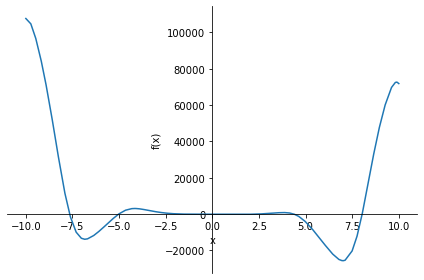

In [17]:
from sympy import symbols
from sympy.plotting import plot

plot(-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30)

    5. Вычислить вершину

In [18]:
solveset(Eq(diff_fx, 0), x)

ConditionSet(x, Eq(12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10, 0), Complexes)

    6. Определить промежутки, на котором f > 0

In [19]:
from sympy import solve_univariate_inequality
from sympy.solvers.inequalities import solve_poly_inequalities
from sympy.solvers.inequalities import reduce_rational_inequalities

In [20]:
reduce_rational_inequalities([[-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30 > 0]], x)

PolynomialError: 
only polynomials and rational functions are supported in this context.

    7. Определить промежутки, на котором f < 0

In [21]:
reduce_rational_inequalities([[-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30 < 0]], x)

PolynomialError: 
only polynomials and rational functions are supported in this context.